In [115]:
import numpy as np
import matplotlib.pyplot as plt

## Набор случайных данных для моделирования.

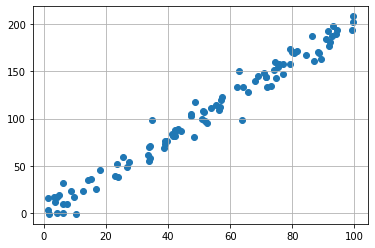

In [116]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=10, size=N)

plt.scatter(X, Y)
plt.grid()
plt.show()

## Метод градиентного спуска.

In [117]:
EPOCHS = 200
LEARNING_RATE = 0.00001

costs_basic = []
teta_basic = []
pred_basic = []
teta_basic = np.random.normal(size=(2,))

# # текущее значение градиента
grad_basic = [0, 0]
# # значение градиента с предыдущего шага итерации.
# grad_last = [0,0]
# # Экспоненциально взвешенное скользящее среднее градиента.
# EMA_grad = [0, 0]

# "импульс"
# v = [0, 0]


for _ in range(EPOCHS):
    predictions = teta_basic[0] + teta_basic[1] * X
    pred_basic.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / len(predictions)
    costs_basic.append(cost)
    
    # вычисляем сумму градиентов в точках X, Y
    grad_basic[0] = np.sum(predictions - Y) / len(predictions)
    grad_basic[1] = np.sum((predictions - Y) * X) / len(predictions)
    
    teta_basic[0] = teta_basic[0] - LEARNING_RATE * grad_basic[0]
    teta_basic[1] = teta_basic[1] - LEARNING_RATE * grad_basic[1]

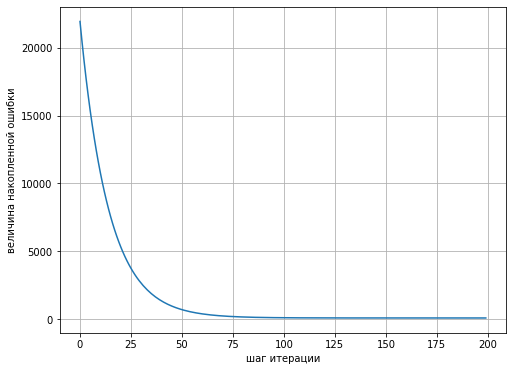

In [118]:
plt.figure(figsize=(8,6))
plt.xlabel("шаг итерации")
plt.ylabel("величина накопленной ошибки")
plt.plot(costs_basic)
plt.grid()
plt.show()

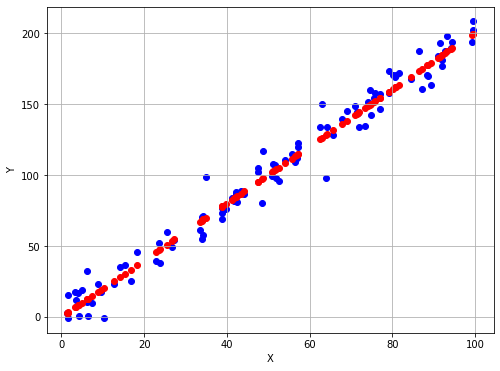

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue')
plt.scatter(X, pred_basic[150], color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [121]:
teta_basic

array([-0.16398131,  2.01878125])

## Nesterov momentum.

In [122]:
EPOCHS = 200
LEARNING_RATE = 0.00001
gamma = 0.9

# alfa параметр для сглаживания экспоненциально взвешенного скользящего среднего.
alfa = 2 / (EPOCHS + 1)

costs = []
teta = []
pred = []
teta = np.random.normal(size=(2,))

# текущее значение градиента
grad = [0, 0]
# значение градиента с предыдущего шага итерации.
grad_last = [0,0]
# Экспоненциально взвешенное скользящее среднее градиента.
EMA_grad = [0, 0]

# "импульс"
v = [0, 0]


for _ in range(EPOCHS):
    predictions = teta[0] + teta[1] * X
    pred.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / len(predictions)
    costs.append(cost)
    
    # вычисляем сумму градиентов в точках X, Y
    grad[0] = np.sum(predictions - Y) / len(predictions)
    grad[1] = np.sum((predictions - Y) * X) / len(predictions)
    
    # экстраполируем значение градиента на следующем шаге итерации, "будущий" суммарный градиент.
    EMA_grad[0] = alfa*grad[0]+(1 - alfa)*grad_last[0]
    EMA_grad[1] = alfa*grad[1]+(1 - alfa)*grad_last[1]
    
    # Определяем моменты для обоих параметров. Для простоты используем один и тот же LEARNING_RATE.
    v[0] = gamma*v[0] + LEARNING_RATE * EMA_grad[0]
    v[1] = gamma*v[1] + LEARNING_RATE * EMA_grad[1]
    
    teta[0] = teta[0] - v[0]
    teta[1] = teta[1] - v[1]
    
    # Сохраняем предыдущее значение суммы градиента для вычисления скользящего среднего.
    grad_last[0] = grad[0]
    grad_last[1] = grad[1]

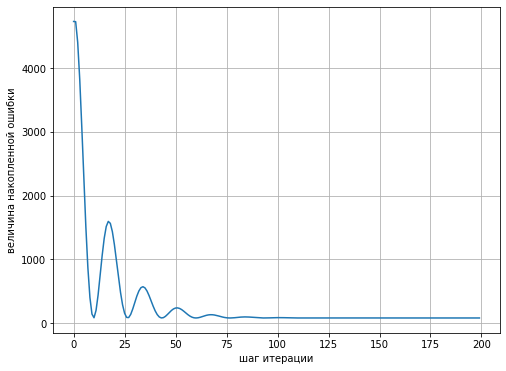

In [123]:
plt.figure(figsize=(8,6))
plt.xlabel("шаг итерации")
plt.ylabel("величина накопленной ошибки")
plt.plot(costs)
plt.grid()
plt.show()

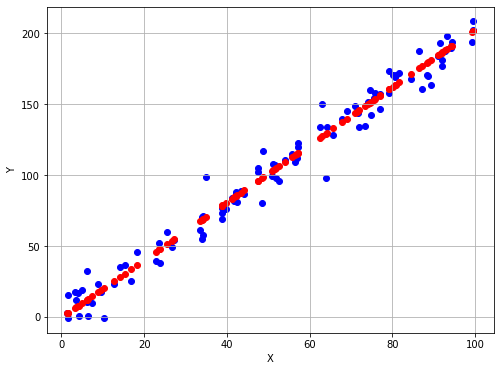

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue')
plt.scatter(X, pred[150], color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [125]:
teta

array([-0.493807 ,  2.0242951])

## RMSProp

In [132]:
EPOCHS = 200
LEARNING_RATE = 0.1

# alfa параметр для сглаживания экспоненциально взвешенного скользящего среднего.
alfa = 2 / (EPOCHS + 1)
# epsilon сглаживающий параметр; избежать деления на ноль.
epsilon = 0.000001

cost_rms = []
teta_rms = []
pred_rms = []
teta_rms = np.random.normal(size=(2,))

grad_rms = [0, 0]
EMA_square_grad = [0, 0]
EMA_square_grad_last = [0, 0]

for _ in range(EPOCHS):
    predictions = teta_rms[0] + teta_rms[1] * X
    pred_rms.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    cost_rms.append(cost)
    
    # сумма градиентов в точках X, Y
    grad_rms[0] = np.sum(predictions - Y) / len(predictions)
    grad_rms[1] = np.sum((predictions - Y) * X) / len(predictions)
    
    # средневзвешенное квадрата сумм градиента
    EMA_square_grad[0] = alfa * np.square(grad_rms[0]) + (1 - alfa) * EMA_square_grad_last[0]
    EMA_square_grad[1] = alfa * np.square(grad_rms[1]) + (1 - alfa) * EMA_square_grad_last[1]
        
    teta_rms[0] = teta_rms[0] - LEARNING_RATE * grad_rms[0] / np.sqrt(EMA_square_grad[0] + epsilon)
    teta_rms[1] = teta_rms[1] - LEARNING_RATE * grad_rms[1] / np.sqrt(EMA_square_grad[1] + epsilon)
    
    # сохраняем предыдуще значение для вычисления средневзвешенного квадрата сумм градиента.
    EMA_square_grad_last[0] = EMA_square_grad[0]
    EMA_square_grad_last[1] = EMA_square_grad[1]

In [133]:
alfa

0.009950248756218905

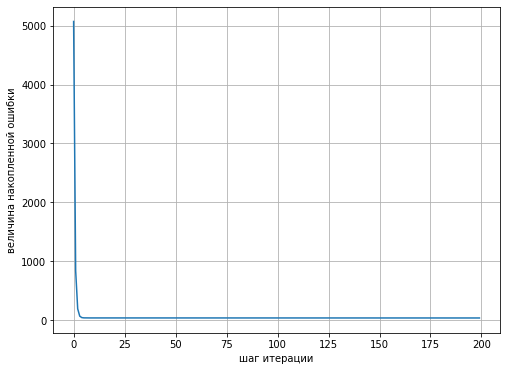

In [134]:
plt.figure(figsize=(8,6))
plt.plot(cost_rms)
plt.xlabel("шаг итерации")
plt.ylabel("величина накопленной ошибки")
plt.grid()
plt.show()

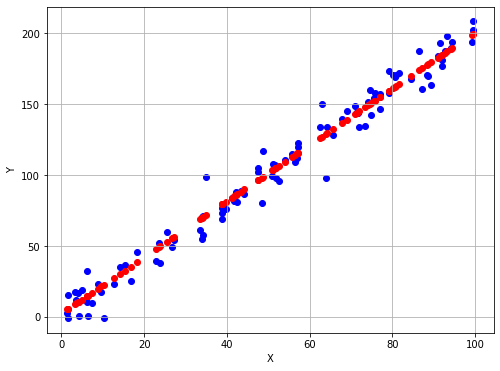

In [136]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue')
plt.scatter(X, pred_rms[100], color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [137]:
teta_rms

array([1.60805637, 1.99471336])